# Homework 5, Part 1: Building a pandas cheat sheet

**Use `animals.csv` to answer the following questions.** The data is small and the questions are pretty simple, so hopefully you can use this for pandas reference in the future.

## 0) Setup

Import pandas **with the correct name** and set `matplotlib` to always display graphics in the notebook.

In [1]:
import pandas as pd
%matplotlib inline

In [2]:
!pip install pandas
#do we need to install everytime? or just once? 

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## 1) Reading in a csv file

Use pandas to read in the animals CSV file, saving it as a variable with the normal name for a dataframe

In [5]:
df = pd.read_csv("animals.csv")
df

,animal,name,length
0,cat,Anne,35
1,cat,Bob,45
2,dog,Egglesburg,65
3,dog,Devon,50
4,cat,Charlie,32
5,dog,Fontaine,35
6,cat,Xypher,10


## 2) Checking your data

Display the number of rows and columns in your data. Also display the names and data types of each column.

In [6]:
type(pd.read_csv("animals.csv"))

pandas.core.frame.DataFrame

In [22]:
df.shape

(7, 3)

In [24]:
df.dtypes
#what does 64 mean here? 

animal    object
name      object
length     int64
dtype: object

## 3) Display the first 3 animals

Hmmm, we know how to take the first 5, but maybe the first 3. Maybe there is an option to change how many you get? Use `?` to check the documentation on the command.

In [7]:
df.head(3)

,animal,name,length
0,cat,Anne,35
1,cat,Bob,45
2,dog,Egglesburg,65


In [8]:
?
#need to check other method

## 4) Sort the animals to show me the 3 longest animals

> **TIP:** You can use `.head()` after you sort things!

In [12]:
df.sort_values(by='length', ascending=False).head(3)

,animal,name,length
2,dog,Egglesburg,65
3,dog,Devon,50
1,cat,Bob,45


## 5) Get the mean and standard deviation of animal lengths

You can do this with separate commands or with a single command.

In [15]:
df.length.mean()

38.857142857142854

In [25]:
df.length.std()
#not sure if .std is standard deviation

17.101935284528196

## 6) How many cats do we have and how many dogs?

You only need one command to do this

In [30]:
df.animal.value_counts()
#category automatically? 

cat    4
dog    3
Name: animal, dtype: int64

## 7) Only display the dogs

> **TIP:** It's probably easiest to make it display the list of `True`/`False` first, then wrap the `df[]` around it.

In [38]:
df.animal == 'dog'

0    False
1    False
2     True
3     True
4    False
5     True
6    False
Name: animal, dtype: bool

In [39]:
df[df.animal == 'dog']

,animal,name,length
2,dog,Egglesburg,65
3,dog,Devon,50
5,dog,Fontaine,35


## 8) Only display the animals that are longer than 40cm

In [45]:
big_animal = df.length > 40
df[big_animal]

,animal,name,length
1,cat,Bob,45
2,dog,Egglesburg,65
3,dog,Devon,50


## 9) `length` is the animal's length in centimeters. Create a new column called `inches` that is the length in inches.

In [58]:
inch = df.length*0.39
df['inch'] = df.length*0.39
df

,animal,name,length,inch
0,cat,Anne,35,13.65
1,cat,Bob,45,17.55
2,dog,Egglesburg,65,25.35
3,dog,Devon,50,19.50
4,cat,Charlie,32,12.48
5,dog,Fontaine,35,13.65
6,cat,Xypher,10,3.90


## 10) Save the cats to a separate variable called `cats`. Save the dogs to a separate variable called `dogs`.

This is the same as listing them, but you just save the result to a variable instead of looking at it. Be sure to use `.head()` to make sure your data looks right.

Once you do this, every time you use `cats` you'll only be talking about the cats, and same for the dogs.

In [131]:
cats = df[df.animal == 'cat']

In [64]:
cats

,animal,name,length,inch
0,cat,Anne,35,13.65
1,cat,Bob,45,17.55
4,cat,Charlie,32,12.48
6,cat,Xypher,10,3.90


In [65]:
dogs = df[df.animal == 'dog']

In [66]:
dogs

,animal,name,length,inch
2,dog,Egglesburg,65,25.35
3,dog,Devon,50,19.50
5,dog,Fontaine,35,13.65


## 11) Display all of the animals that are cats and above 12 inches long.

First do it using the `cats` variable, then also do it using your `df` dataframe.

> **TIP:** For multiple conditions, you use `df[(one condition) & (another condition)]`

In [74]:
df.inch > 12

0     True
1     True
2     True
3     True
4     True
5     True
6    False
Name: inch, dtype: bool

In [126]:
#df[cats & (df.inch > 12)]
# this doesnt work but there is another method. 

In [82]:
df[(df.animal == 'cat') & (df.inch > 12)]

,animal,name,length,inch
0,cat,Anne,35,13.65
1,cat,Bob,45,17.55
4,cat,Charlie,32,12.48


## 12) What's the mean length of a cat? What's the mean length of a dog?

In [86]:
cats['length'].mean()

30.5

In [87]:
dogs['length'].mean()

50.0

## 13) If you didn't already, use `groupby` to do #12 all at once

In [88]:
df.groupby(by='animal').mean()

,length,inch
animal,,
cat,30.5,11.895
dog,50.0,19.500


## 14) Make a histogram of the length of dogs.

We didn't talk about how to make a histogram in class! It **does not** use `plot()`. Imagine you're a programmer who doesn't want to type out `histogram` - what do you think you'd type instead?

> **TIP:** The method is four letters long
>
> **TIP:** First you'll say "I want the length column," then you'll say "make a histogram"
>
> **TIP:** This is the worst histogram ever

In [96]:
dogs['name']

2    Egglesburg
3         Devon
5      Fontaine
Name: name, dtype: object

In [101]:
dogs['length']

2    65
3    50
5    35
Name: length, dtype: int64

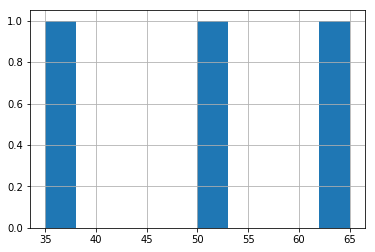

In [114]:
dogs.length.hist()
#why sometimes hist needs to set column and bins? 

## 15) Make a horizontal bar graph of the length of the animals, with the animal's name as the label

> **TIP:** It isn't `df['length'].plot()`, because it needs *both* columns. Think about how we did the scatterplot in class.
>
> **TIP:** Which is the `x` axis and which is the `y` axis? You'll notice pandas is kind of weird and wrong.
>
> **TIP:** Make sure you specify the `kind` of graph or else it will be a weird line thing
>
> **TIP:** If you want, you can set a custom size for your plot by sending it something like `figsize=(15,2)`

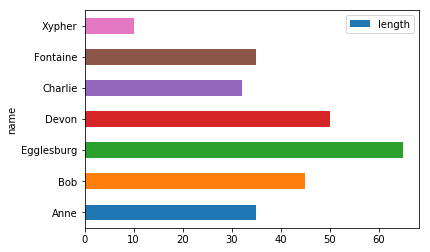

In [122]:
df.plot(x='name', y='length', kind='barh')

## 16) Make a sorted horizontal bar graph of the cats, with the larger cats on top

> **TIP:** Think in steps, even though it's all on one line - first make sure you can sort it, then try to graph it.

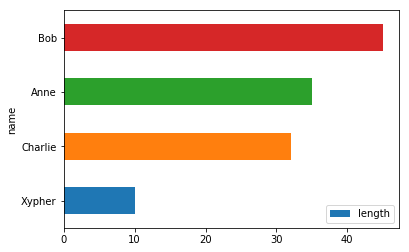

In [136]:
df[df.animal == 'cat'].sort_values(by= 'length').plot(x='name', y='length', kind='barh')
#why I cannot use cats variable here? 

## 17) As a reward for getting down here: run the following code, then plot the number of dogs vs. the number of cats

> **TIP:** Counting the number of dogs and number of cats does NOT use `.groupby`! That's only for calculations.
>
> **TIP:** You can set a title with `title="Number of animals"`

In [137]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

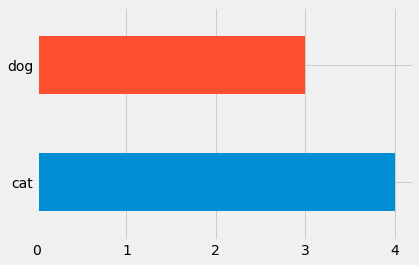

In [139]:
df.animal.value_counts().plot(x='cat', y='dog',kind='barh')